In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_AL_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.11388,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.0900,0.78343,0.51035,0.03043,0.100660
1,NaN,0.206580,0.48861,1.43430,3.12990,NaN,1.42850,NaN,NaN,2.13180,NaN,NaN
2,-1.11540,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.2173,3.90290,1.51440,2.43890,0.633580
3,-0.53916,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.3527,0.66126,3.13510,3.93810,3.734600
4,-0.26840,-1.006000,NaN,NaN,3.20140,3.37740,1.52260,NaN,NaN,NaN,3.91720,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.86710,-4.729200,3.72580,3.70480,0.88269,0.35406,1.62780,3.2940,1.08500,0.15740,0.46504,2.851400
396,0.26463,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,3.7936,0.12790,0.54249,3.36580,3.755600
397,-3.47910,-1.993300,1.32480,1.77210,2.55090,1.47010,0.92540,1.8411,3.47730,0.95496,1.52630,2.123800
398,7.29300,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,0.2780,0.99059,3.43740,1.81620,0.087212


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	18
float64		column 2	43
float64		column 3	31
float64		column 4	25
float64		column 5	24
float64		column 6	37
float64		column 7	48
float64		column 8	54
float64		column 9	37
float64		column 10	43
float64		column 11	36
float64		column 12	42


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,382.000000,357.000000,369.000000,375.000000,376.000000,363.000000,352.000000,346.000000,363.000000,357.000000,364.000000,358.000000
mean,-0.115375,0.027898,2.024221,1.892674,1.910030,1.943588,2.044525,1.942868,1.966451,2.015097,1.978669,1.948914
std,2.562267,2.778891,1.135547,1.136374,1.164056,1.131849,1.166522,1.127989,1.146111,1.154442,1.151856,1.194870
min,-7.771000,-6.828400,0.005583,0.005376,0.000530,0.018503,0.003618,0.007321,0.007019,0.055837,0.030430,0.001972
25%,-0.688645,-0.838750,1.118600,0.946540,0.874190,0.993680,1.033050,1.017975,1.003290,1.023200,0.926330,0.857982
50%,-0.074609,-0.004739,2.063700,1.789600,1.866400,1.950100,2.136900,1.868850,2.065300,2.069800,1.931200,1.920650
75%,0.753763,0.887210,2.987100,2.786300,2.943550,2.898750,3.016100,2.932100,2.928700,3.040000,2.967075,2.992175
max,8.409300,6.777100,3.976400,3.993400,3.979000,3.992300,3.996300,3.995000,3.985500,3.984300,3.967600,3.996000


<AxesSubplot:>

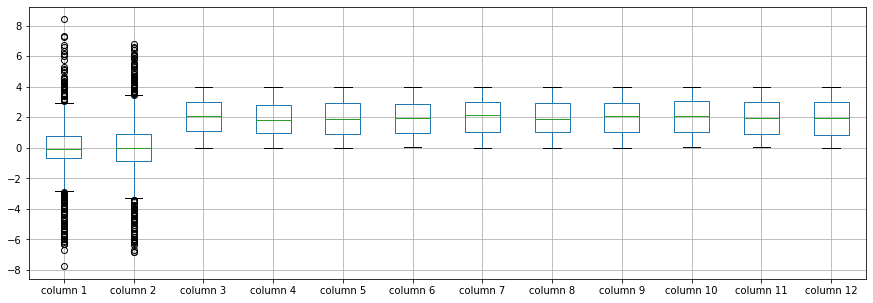

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    -0.115375
column 2     0.027898
column 3     2.024221
column 4     1.892674
column 5     1.910030
column 6     1.943588
column 7     2.044525
column 8     1.942868
column 9     1.966451
column 10    2.015097
column 11    1.978669
column 12    1.948914
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,0.047708,-0.057741,-0.069991,-0.029106,0.001302,-0.055811,0.030885,0.021752,0.019907,0.115571,0.011817
column 2,0.047708,1.000000,-0.045009,0.014957,-0.058563,-0.044847,-0.008035,-0.035144,0.003273,0.027253,0.000646,0.049635
column 3,-0.057741,-0.045009,1.000000,0.010359,-0.048128,-0.042482,-0.080643,0.064572,0.131860,-0.048501,-0.088825,0.020564
column 4,-0.069991,0.014957,0.010359,1.000000,0.002380,0.111302,-0.034550,0.105709,-0.029494,0.090683,-0.007897,-0.030206
column 5,-0.029106,-0.058563,-0.048128,0.002380,1.000000,0.048039,0.042782,0.020794,0.001309,0.022533,0.000640,-0.023691
column 6,0.001302,-0.044847,-0.042482,0.111302,0.048039,1.000000,-0.018855,0.055220,-0.021769,0.030787,0.031534,-0.041437
column 7,-0.055811,-0.008035,-0.080643,-0.034550,0.042782,-0.018855,1.000000,-0.027766,0.070730,0.066865,0.018248,-0.091759
column 8,0.030885,-0.035144,0.064572,0.105709,0.020794,0.055220,-0.027766,1.000000,0.029169,-0.119696,-0.064113,0.001842
column 9,0.021752,0.003273,0.131860,-0.029494,0.001309,-0.021769,0.070730,0.029169,1.000000,0.018678,0.004521,0.064134
column 10,0.019907,0.027253,-0.048501,0.090683,0.022533,0.030787,0.066865,-0.119696,0.018678,1.000000,0.011973,0.045157


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+55,12+55+55,12+55+55+55,12+55+55+55+55,12+55+55+55+55+55,12+55+55+55+55+55+55,12+55+55+55+55+55,12+55+55+55+55,12+55+55+55,12+55+55,12+55,12], vae_layer = False, seed = 55)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 25.261240158081055
Epoch: 1 , loss: 25.169359130859377
Epoch: 2 , loss: 25.051306228637696
Epoch: 3 , loss: 24.78484069824219
Epoch: 4 , loss: 22.72026679992676
Epoch: 5 , loss: 21.224764404296874
Epoch: 6 , loss: 21.042743606567385
Epoch: 7 , loss: 20.783300094604492
Epoch: 8 , loss: 20.660012512207032
Epoch: 9 , loss: 20.299672927856445
Epoch: 10 , loss: 20.336628341674803
Epoch: 11 , loss: 19.860522155761718
Epoch: 12 , loss: 19.849940414428712
Epoch: 13 , loss: 19.675564193725585
Epoch: 14 , loss: 19.45008369445801
Epoch: 15 , loss: 19.194006881713868
Epoch: 16 , loss: 19.070907821655272
Epoch: 17 , loss: 18.68940948486328
Epoch: 18 , loss: 18.658008918762206
Epoch: 19 , loss: 18.349557609558104
Epoch: 20 , loss: 18.280551567077637
Epoch: 21 , loss: 18.436336822509766
Epoch: 22 , loss: 18.06151741027832
Epoch: 23 , loss: 17.93681640625
Epoch: 24 , loss: 18.059348373413087
Epoch: 25 , loss: 18.09069

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.70595
column 2     0.12893
column 3     1.05810
column 4     2.13620
column 5     2.14860
column 6     2.24580
column 7     3.72770
column 8     2.22720
column 9     1.94350
column 10    1.98700
column 11    2.47070
column 12    0.36826
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.084407,0.000000,0.000000,0.000000,0.0,-0.611516,0.000000,0.520441,-0.522054,0.000000,-0.318597,-3.168637
2,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,-1.934771,-0.672604,0.0,0.000000,0.000000,-0.064262,-2.186155,-2.701569,0.000000,-0.000374
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
396,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
397,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
398,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(36.816877220253446, 163.27447192538312)

In [17]:
NRMS=numerator/denominator
NRMS


0.2254907138029444

In [18]:
new_df.iloc[66,:]

column 1     0.82272
column 2     0.26776
column 3     0.40343
column 4     1.18720
column 5     3.95660
column 6     2.58300
column 7     2.83060
column 8     3.07420
column 9     1.53810
column 10    0.24620
column 11    0.85334
column 12    3.60440
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.978900,1.836300,2.88660,2.469600,0.215410,3.090000,0.783430,0.510350,0.030430,0.100660
1,-0.055018,0.206580,0.488610,1.434300,3.12990,0.666284,1.428500,0.663771,0.672746,2.131800,0.666133,0.675863
2,-1.115400,0.217560,1.610500,1.337100,3.76820,1.210000,3.996300,2.217300,3.902900,1.514400,2.438900,0.633580
3,-0.539160,-0.061874,0.364860,0.332780,0.19027,0.567160,1.660100,2.352700,0.661260,3.135100,3.938100,3.734600
4,-0.268400,-1.006000,0.947429,0.888996,3.20140,3.377400,1.522600,0.920488,0.923245,0.954831,3.917200,0.946686
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.725800,3.704800,0.88269,0.354060,1.627800,3.294000,1.085000,0.157400,0.465040,2.851400
396,0.264630,-6.107600,3.905400,1.337700,1.41870,1.686100,1.095100,3.793600,0.127900,0.542490,3.365800,3.755600
397,-3.479100,-1.993300,1.324800,1.772100,2.55090,1.470100,0.925400,1.841100,3.477300,0.954960,1.526300,2.123800
398,7.293000,-0.411470,2.494800,0.396550,2.99900,3.410100,2.951600,0.278000,0.990590,3.437400,1.816200,0.087212


In [21]:
imputations[-1].to_excel("Difdoug_AL_10(imp).xlsx", index=False, header=False)